**(1) 데이터 가져오기**

In [1]:
train = '/content/train.csv'
# train = '~/data/data/bike-sharing-demand/train.csv'

In [5]:
import pandas as pd
df = pd.read_csv(train)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


- datetime - hourly date + timestamp   
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

**(2) datetime 컬럼 자료형 변환 및 컬럼 생성**

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])
df[:2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [8]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

df[:2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0


**(3) datetime의 각 데이터 개수 시각화**

<Axes: ylabel='count'>

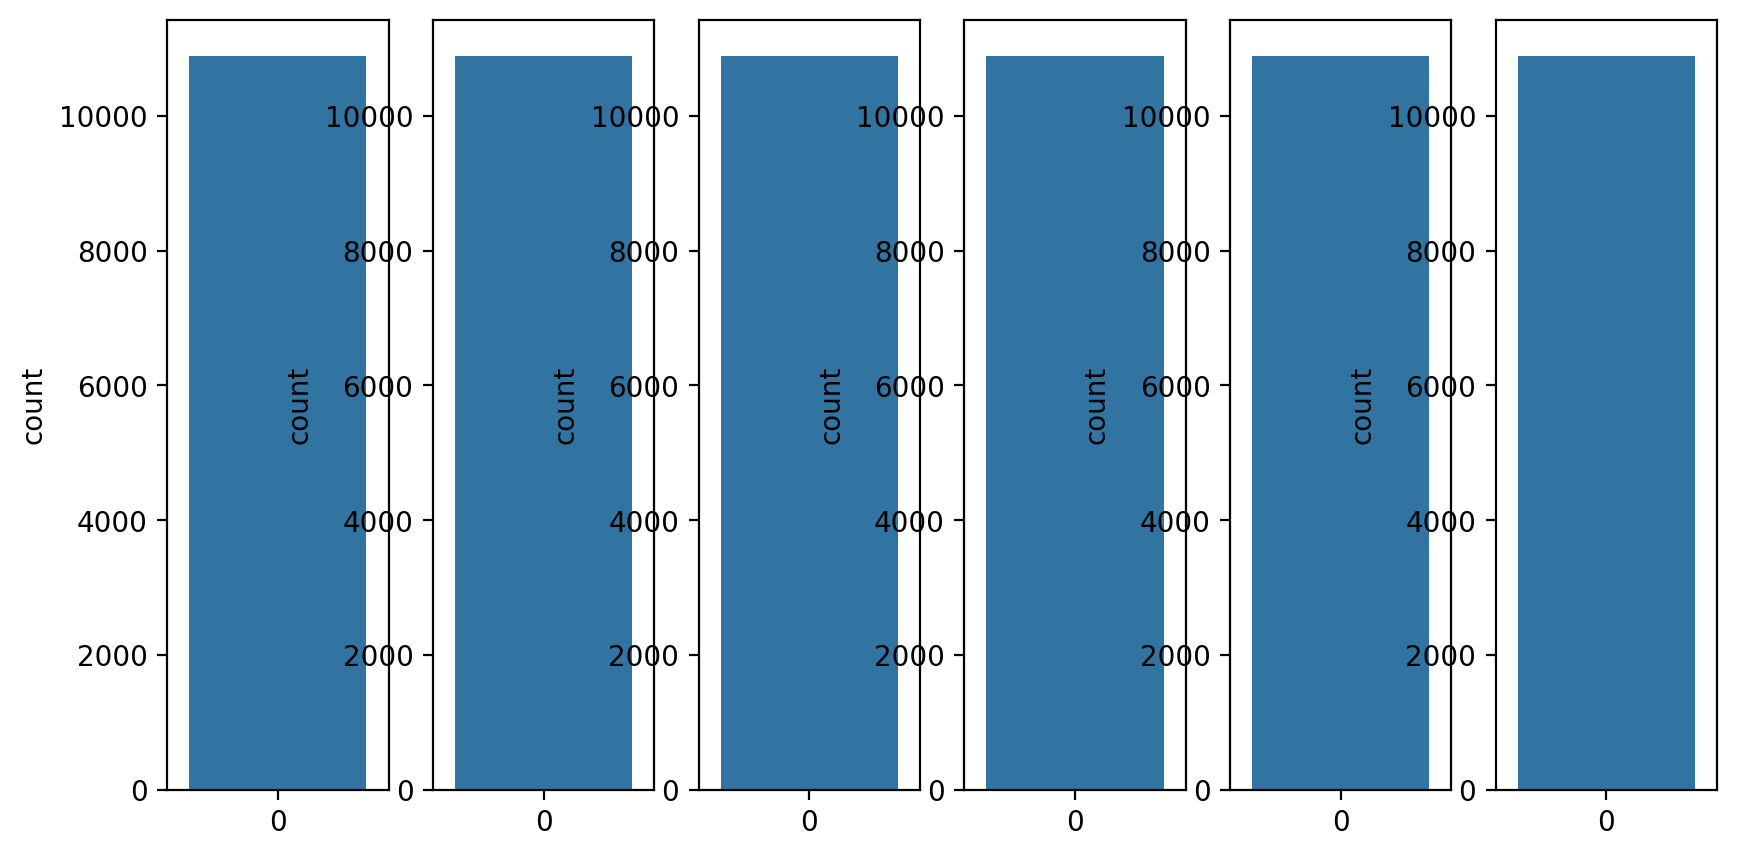

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols = 6, figsize=(10, 5))

sns.countplot(df['year'], ax=ax1)
sns.countplot(df['month'], ax=ax2)
sns.countplot(df['day'], ax=ax3)
sns.countplot(df['hour'], ax=ax4)
sns.countplot(df['minute'], ax=ax5)
sns.countplot(df['second'], ax=ax6)

<Axes: xlabel='second', ylabel='count'>

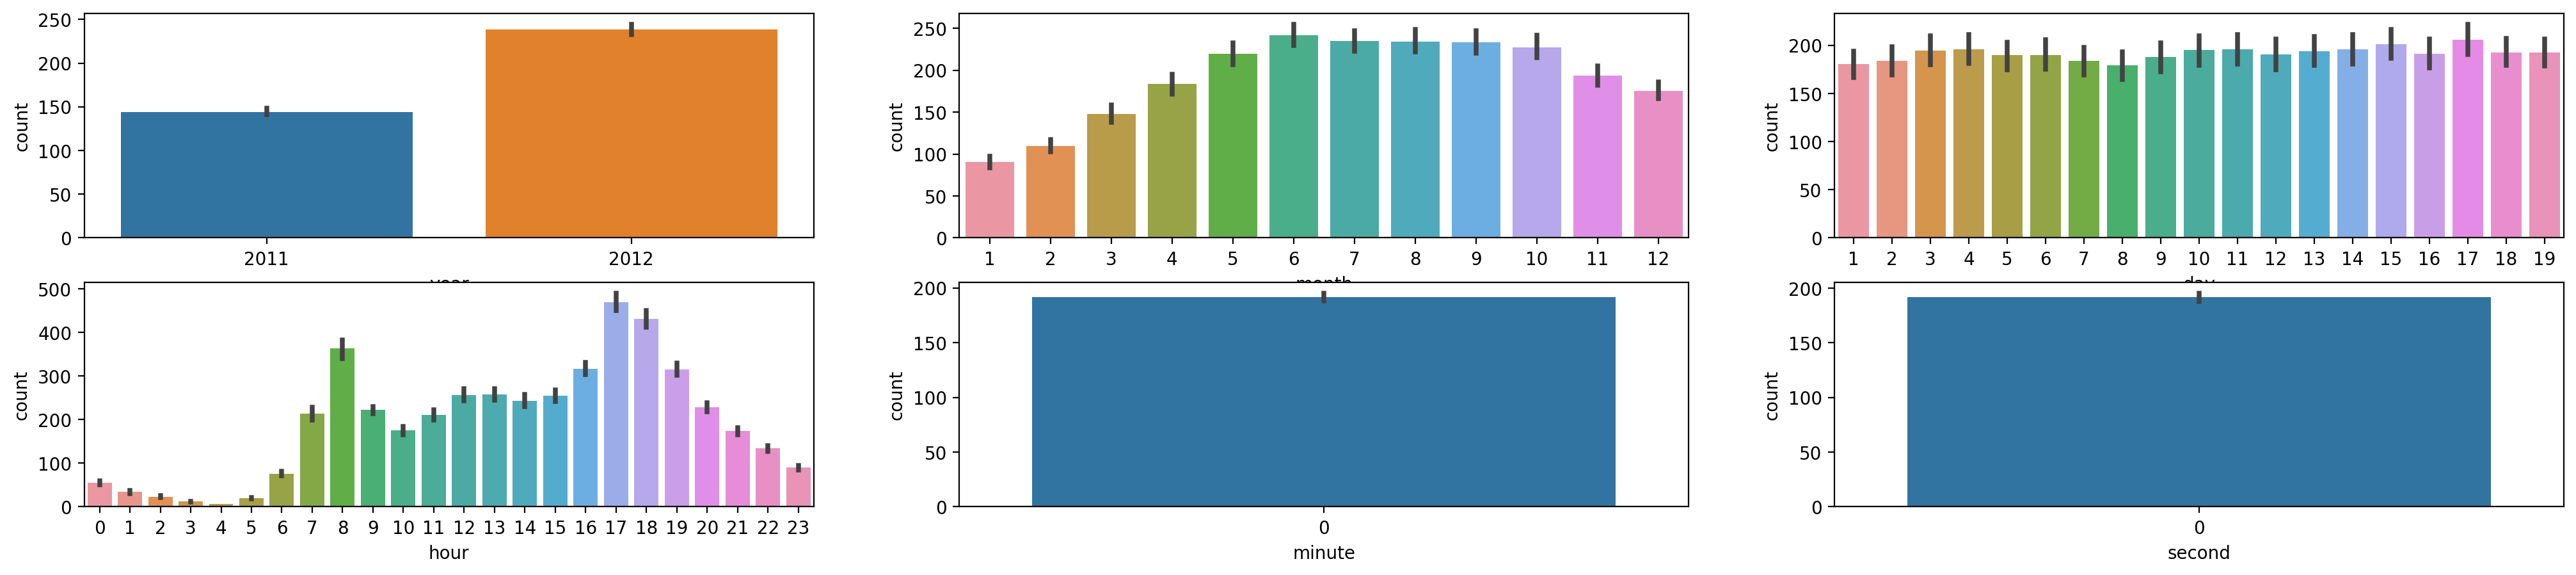

In [25]:
fig = plt.figure(figsize=(25, 5))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)


sns.barplot(x=df['year'], y=df['count'], ax=ax1)
sns.barplot(x=df['month'], y=df['count'], ax=ax2)
sns.barplot(x=df['day'], y=df['count'], ax=ax3)
sns.barplot(x=df['hour'], y=df['count'], ax=ax4)
sns.barplot(x=df['minute'], y=df['count'], ax=ax5)
sns.barplot(x=df['second'], y=df['count'], ax=ax6)

-> minute, second는 빼도될 듯

**(4) X, y 컬럼 선택 및 train/test 데이터 분리**

In [34]:
X = df.drop(['datetime','minute', 'second', 'casual', 'registered','count'], axis=1).values
y = df['count'].values



In [38]:
X_df = df.drop(['datetime','minute', 'second', 'casual', 'registered','count'], axis=1)
X_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

**(5) LinearRegression 모델 학습**

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**(6) x_test predict, loss 값 계산**

In [36]:
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print('predictions : ', predictions)
print('mse : ', mse)
print('rmse : ', rmse)

predictions :  [248.10627003  48.79765547 200.90676727 ... 309.7528022   38.17030198
 243.62697388]
mse :  19945.370053754104
rmse :  141.2280781351715


**(7-1) x: temp, y:count 로 시각화**

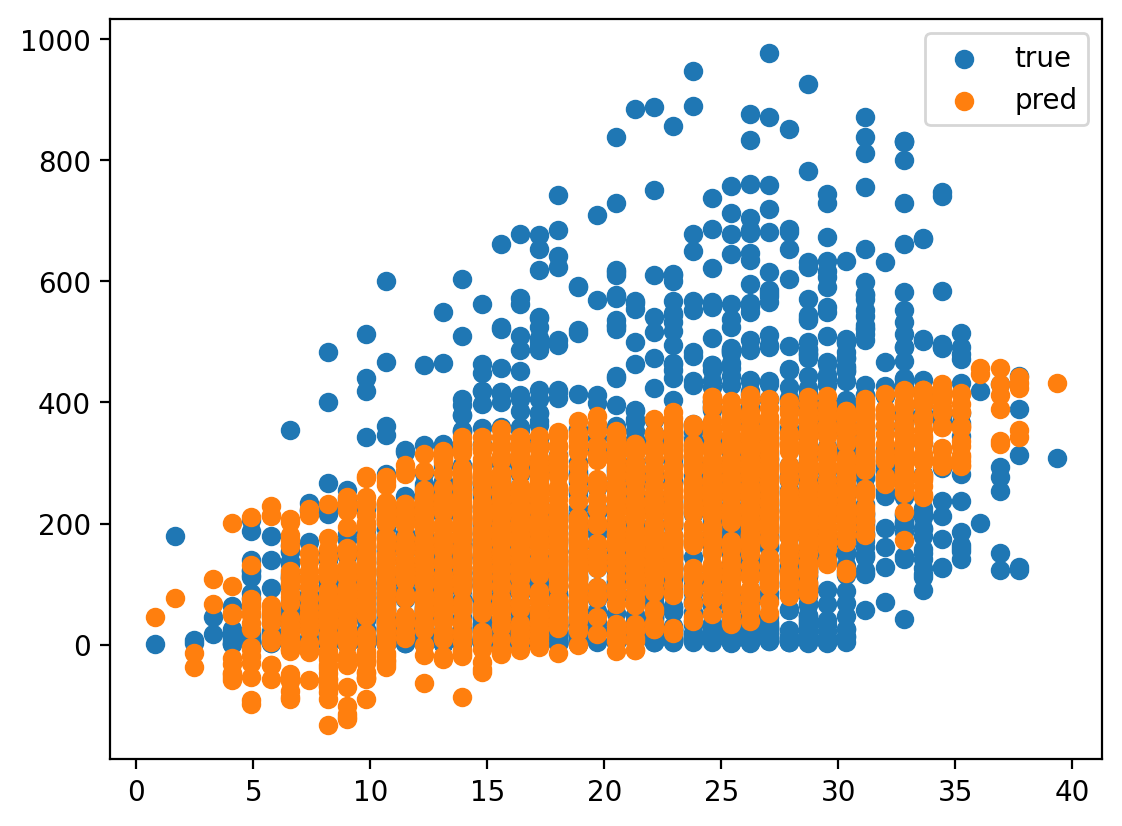

In [37]:
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.legend()
plt.show()

**(7-2) x: humidity, y:count 로 시각화**

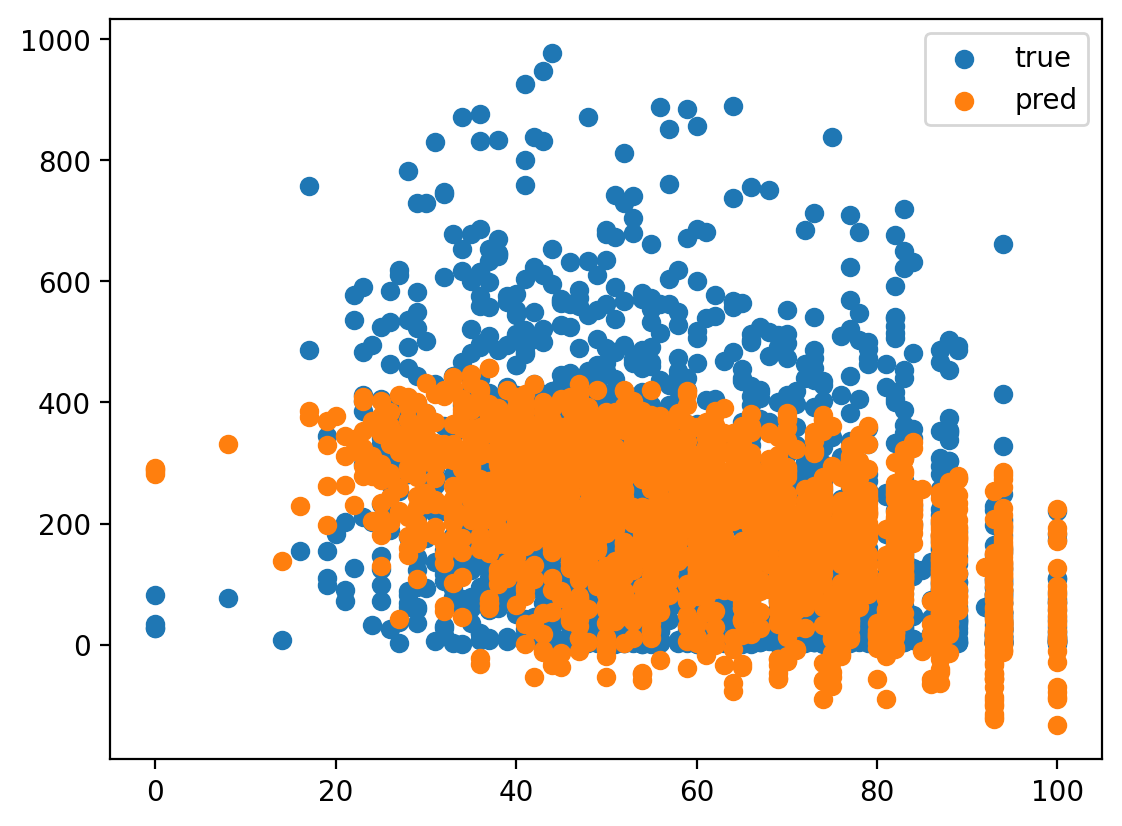

In [39]:
plt.scatter(X_test[:, 6], y_test, label="true")
plt.scatter(X_test[:, 6], predictions, label="pred")
plt.legend()
plt.show()